In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from astropy.table import QTable
import astropy.units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

In [2]:
p1 = os.getcwd() + '/Catalogues/'
tab = QTable.read(p1 + 'HSC_I_COSMOS_1_model_psf_cat.fits')
#tab.columns

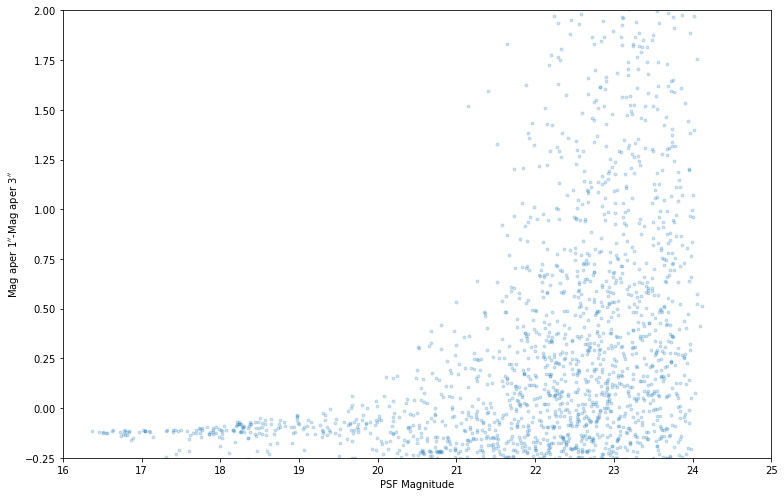

In [3]:
# Plotting
fig = plt.figure(figsize = (11,7))
ax = fig.add_subplot(111)
ax.set_xlabel(r'PSF Magnitude')
ax.set_ylabel(r"Mag aper $1''$-Mag aper $3''$")
ax.plot(tab['MAG_PSF'], tab['MAG_APER'][:,-1]-tab['MAG_APER'][:,4], '.', alpha=0.2)
ax.set_ylim([-0.25, 2])
ax.set_xlim([16,25])
plt.tight_layout()

In [4]:
tab2 = QTable.read(p1 + 'HSC_I_COSMOS_3_model_psf_cat.fits')

In [5]:
print(tab['MAG_APER'].shape)
print(tab2['MAG_APER'].shape)

(5425, 12)
(4917, 12)


In [6]:
rad = 1.*u.arcsec
pos1 = SkyCoord(ra=tab['ALPHA_J2000'], dec=tab['DELTA_J2000'], unit='deg')
pos2 = SkyCoord(ra=tab2['ALPHA_J2000'], dec=tab2['DELTA_J2000'], unit='deg')

idx, d2d, _ = match_coordinates_sky(pos2, pos1, nthneighbor=1)

t1_match = tab[idx[d2d<rad]]

t2_match = tab2[d2d<rad]

In [7]:
mag_diff = t1_match['MAG_PSF'] - t2_match['MAG_PSF']
print(np.mean(mag_diff))

-1.0294371843338013 mag


In [8]:
mask = np.where((t1_match['MAG_PSF'].value>18.5)&(t1_match['MAG_PSF'].value<21.5)&(t1_match['MAG_APER'][:,1].value-t1_match['MAG_APER'][:,4].value<0.55))[0]

print(np.mean(mag_diff[mask]))

-0.08247487246990204 mag


(array([ 1.,  3.,  9., 20., 19., 21., 17.,  2.,  5.,  7.]),
 array([-0.10355568, -0.09941463, -0.09527359, -0.09113254, -0.0869915 ,
        -0.08285046, -0.07870941, -0.07456837, -0.07042732, -0.06628628,
        -0.06214523], dtype=float32),
 <BarContainer object of 10 artists>)

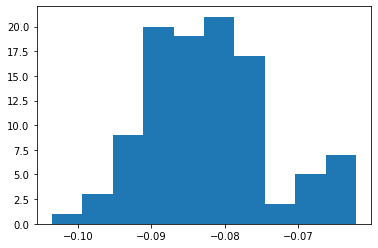

In [9]:
plt.hist(mag_diff[mask].value)